In [4]:
# load default python modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
plt.style.use('seaborn-whitegrid')

# Reading data and first exploration

In [119]:
#read data
df_train = pd.read_csv('train.csv',nrows = 2000000, parse_dates=["pickup_datetime"])
df_train.head()


key  fare_amount     pickup_datetime  \
0    2009-06-15 17:26:21.0000001          4.5 2009-06-15 17:26:21   
1    2010-01-05 16:52:16.0000002         16.9 2010-01-05 16:52:16   
2   2011-08-18 00:35:00.00000049          5.7 2011-08-18 00:35:00   
3    2012-04-21 04:30:42.0000001          7.7 2012-04-21 04:30:42   
4  2010-03-09 07:51:00.000000135          5.3 2010-03-09 07:51:00   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.844311        40.721319         -73.841610         40.712278   
1        -74.016048        40.711303         -73.979268         40.782004   
2        -73.982738        40.761270         -73.991242         40.750562   
3        -73.987130        40.733143         -73.991567         40.758092   
4        -73.968095        40.768008         -73.956655         40.783762   

   passenger_count  
0                1  
1                1  
2                2  
3                1  
4                1

In [120]:
# check datatypes
df_train.dtypes

key                          object
fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dtype: object

In [121]:
# check statistics of the features
df_train.describe()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  2.000000e+06      2.000000e+06     2.000000e+06       1.999986e+06   
mean   1.134779e+01     -7.252321e+01     3.992963e+01      -7.252395e+01   
std    9.852883e+00      1.286804e+01     7.983352e+00       1.277497e+01   
min   -6.200000e+01     -3.377681e+03    -3.458665e+03      -3.383297e+03   
25%    6.000000e+00     -7.399208e+01     4.073491e+01      -7.399141e+01   
50%    8.500000e+00     -7.398181e+01     4.075263e+01      -7.398016e+01   
75%    1.250000e+01     -7.396713e+01     4.076710e+01      -7.396369e+01   
max    1.273310e+03      2.856442e+03     2.621628e+03       3.414307e+03   

       dropoff_latitude  passenger_count  
count      1.999986e+06     2.000000e+06  
mean       3.992808e+01     1.684113e+00  
std        1.032382e+01     1.314982e+00  
min       -3.461541e+03     0.000000e+00  
25%        4.073400e+01     1.000000e+00  
50%        4.075312e+01     1.000000e+00  
75%        4.076809e+01     2.000000e+00  
max        3.345917e+03     2.080000e+02

In [128]:
# check/remove unreasonable data
print('Old size: %d' %len(df_train))
df_train = df_train[df_train.fare_amount>=0]
print('New size: %d' %len(df_train))

Old size: 1999909
New size: 1999909


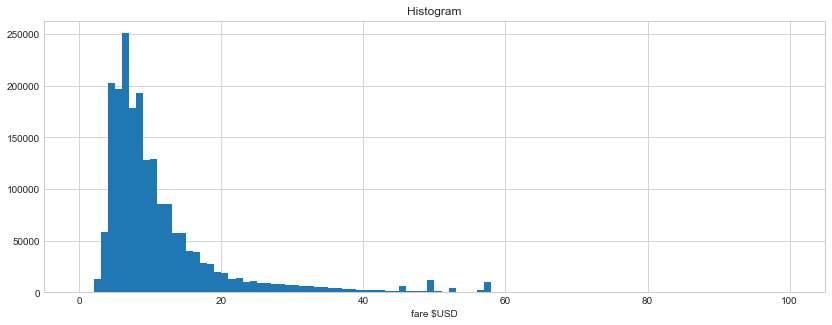

In [129]:
# plot histogram of fare
df_train[df_train.fare_amount<100].fare_amount.hist(bins=100,figsize=(14,5))
plt.xlabel('fare $USD')
plt.title('Histogram');


# Remove missing data

In [130]:
#find which column has null value
print(df_train.isnull().sum())

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [125]:
print('Old size: %d' % len(df_train))
df_train = df_train.dropna(how = 'any', axis = 'rows')
print('New size: %d' % len(df_train))


Old size: 1999923
New size: 1999909


# Test data

In [131]:
# read data in pandas dataframe
df_test = pd.read_csv('test.csv')
df_test.head(5)

key          pickup_datetime  pickup_longitude  pickup_latitude  \
0  08:24.0  2015-01-27 13:08:24 UTC        -73.973320        40.763805   
1  08:24.0  2015-01-27 13:08:24 UTC        -73.986862        40.719383   
2  53:44.0  2011-10-08 11:53:44 UTC        -73.982524        40.751260   
3  12:12.0  2012-12-01 21:12:12 UTC        -73.981160        40.767807   
4  12:12.0  2012-12-01 21:12:12 UTC        -73.966046        40.789775   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.981430         40.743835                1  
1         -73.998886         40.739201                1  
2         -73.979654         40.746139                1  
3         -73.990448         40.751635                1  
4         -73.988565         40.744427                1

In [132]:
df_test.describe()

pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
count       9914.000000      9914.000000        9914.000000       9914.000000   
mean         -73.974722        40.751041         -73.973657         40.751743   
std            0.042774         0.033541           0.039072          0.035435   
min          -74.252193        40.573143         -74.263242         40.568973   
25%          -73.992501        40.736125         -73.991247         40.735254   
50%          -73.982326        40.753051         -73.980015         40.754065   
75%          -73.968013        40.767113         -73.964059         40.768757   
max          -72.986532        41.709555         -72.990963         41.696683   

       passenger_count  
count      9914.000000  
mean          1.671273  
std           1.278747  
min           1.000000  
25%           1.000000  
50%           1.000000  
75%           2.000000  
max           6.000000

# Location data

Easy to use map and GPS tool: https://www.gps-coordinates.net/
Calculate distance between locations: https://www.travelmath.com/flying-distance/
Open street map to grab using bouding box a map: https://www.openstreetmap.org/export#map=8/52.154/5.295

In [133]:
# find the location arrange:
# max and min longitude test set
min(df_test.pickup_longitude.min(), df_test.dropoff_longitude.min()),\
max(df_test.pickup_longitude.max(), df_test.dropoff_longitude.max())

(-74.263242, -72.986532)

In [134]:
# max and min latitude test set
min(df_test.pickup_latitude.min(), df_test.dropoff_latitude.min()),\
max(df_test.pickup_latitude.max(), df_test.dropoff_latitude.max())

(40.568973, 41.709555)

In [135]:
# make sure the new data is within the location area(BB for bounding box)
def select_within_boundingbox(df,BB):
    return (df.pickup_longitude >= BB[0]) & (df.pickup_longitude <= BB[1]) & \
           (df.pickup_latitude >= BB[2]) & (df.pickup_latitude <= BB[3]) & \
           (df.dropoff_longitude >= BB[0]) & (df.dropoff_longitude <= BB[1]) & \
           (df.dropoff_latitude >= BB[2]) & (df.dropoff_latitude <= BB[3])

# load image of NYC map            
BB = (-74.5, -72.8, 40.5, 41.8)
#nyc_map = plt.imread('http://aiblog.nl/download/nyc_-74.5_-72.8_40.5_41.8.png')
nyc_map = plt.imread('./nyc_-74.5_-72.8_40.5_41.8.png')
# load extra image to zoom in on NYC
BB_zoom = (-74.3, -73.7, 40.5, 40.9)
#nyc_map_zoom = plt.imread('http://aiblog.nl/download/nyc_-74.3_-73.7_40.5_40.9.png')
nyc_map_zoom = plt.imread('./nyc_-74.3_-73.7_40.5_40.9.png')

In [136]:
print('Old size: %d' % len(df_train))
df_train = df_train[select_within_boundingbox(df_train,BB)]
print('New size: %d' % len(df_train))

Old size: 1999909
New size: 1957918


In [139]:
# function of plot data on the NYC map
def plot_on_map(df, BB, nyc_map, s=10, alpha = 0.2):
    fig, axs = plt.subplots(1,2,figsize=(16,10))
    axs[0].scatter(df.pickup_longitude, df.pickup_latitude, zorder=1, alpha=alpha, c='r',s=s)
    axs[0].set_xlim((BB[0],BB[1]))
    axs[0].set_ylim((BB[2],BB[3]))
    axs[0].set_title('Pickup locations')
    axs[0].imshow(nyc_map,zorder=0, extent=BB)
    
    axs[1].scatter(df.dropoff_longitude, df.dropoff_latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[1].set_xlim((BB[0], BB[1]))
    axs[1].set_ylim((BB[2], BB[3]))
    axs[1].set_title('Dropoff locations')
    axs[1].imshow(nyc_map, zorder=0, extent=BB)

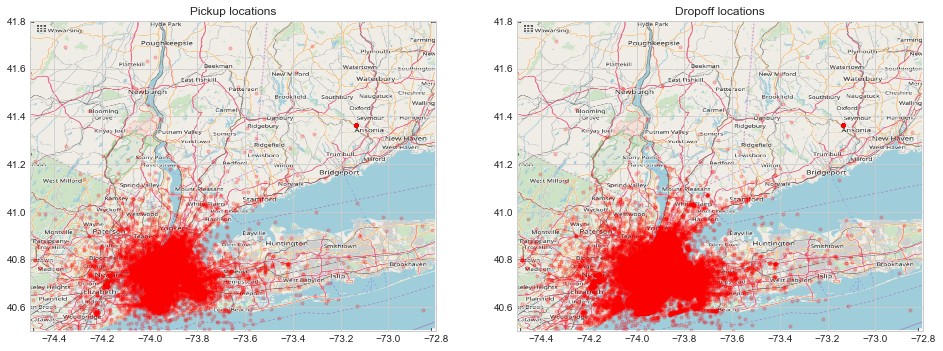

In [141]:
# plot training data on the map
plot_on_map(df_train, BB, nyc_map)

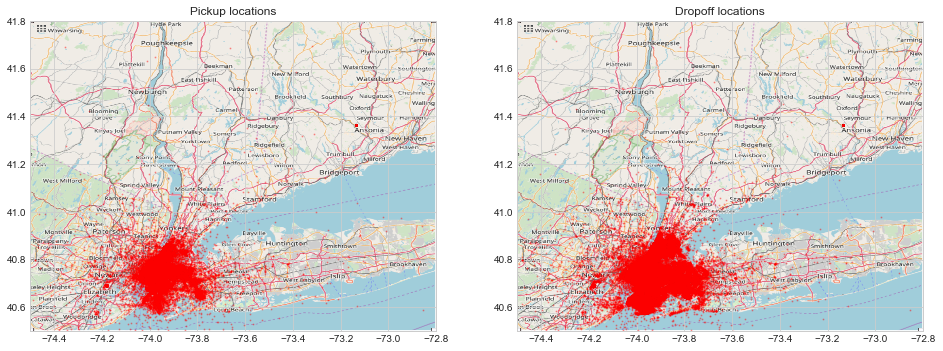

In [142]:
plot_on_map(df_train,BB,nyc_map,s=1,alpha=0.3)

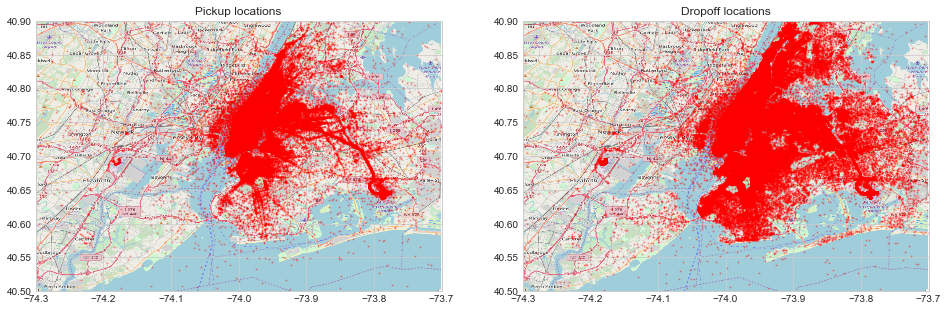

In [143]:
# plot training data on map zoomed in
plot_on_map(df_train, BB_zoom, nyc_map_zoom, s=1, alpha=0.3)

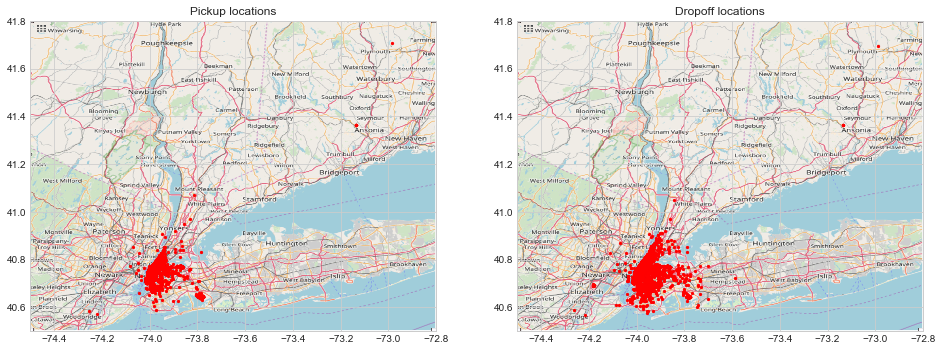

In [146]:
# plot test data on the map
plot_on_map(df_test, BB, nyc_map, alpha=1.0, s=5)
# s for the size of the 

# Removing datapoint in water

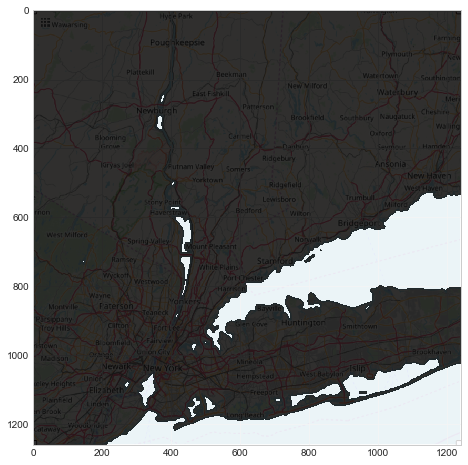

In [147]:
# read nyc mask and turn into boolean map with
# land = True, water = False
nyc_mask = plt.imread('./nyc_mask-74.5_-72.8_40.5_41.8.png')\
                        [:,:,0] > 0.9
plt.figure(figsize=(8,8))
plt.imshow(nyc_map, zorder=0)
plt.imshow(nyc_mask, zorder=1,alpha=0.8);
# alpha = 0.8, 表示第二层的饱和度


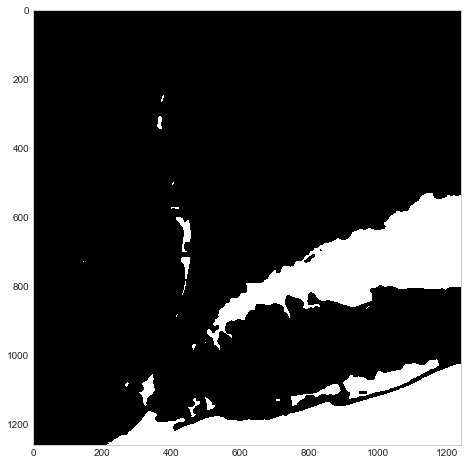

In [149]:
# read nyc mask and turn into boolean map with
# land = True, water = False
nyc_mask = plt.imread('./nyc_mask-74.5_-72.8_40.5_41.8.png')[:,:,2]>0.1
# 遍历图片找出， >0.x 显示所有值为1的点，<0.x 则显示所有为0的点
plt.figure(figsize=(8,8))
plt.imshow(nyc_map, zorder=0)
plt.imshow(nyc_mask, zorder=1);

In [150]:
# Convert longitude/latitude coordinate to xy pixel coordinate(to match the mask frame)

def lonlat_to_xy(longitude, latitude, dx, dy,BB):
    # dx/dy, means the number of pixel
    return (dx*(longitude-BB[0])/(BB[1]-BB[0])).astype('int'), \
(dy- dy*(latitude-BB[2])/(BB[3]-BB[2])).astype('int')

In [158]:
print(nyc_mask.shape[1],len(nyc_mask[0]),nyc_mask.shape[0],len(nyc_mask))

(1242, 1242, 1262, 1262)


In [159]:
pickup_x,pickup_y = lonlat_to_xy(df_train.pickup_longitude, df_train.pickup_latitude, \
                                nyc_mask.shape[1],nyc_mask.shape[0],BB)
dropoff_x,dropoff_y = lonlat_to_xy(df_train.dropoff_longitude, df_train.dropoff_latitude, \
                                nyc_mask.shape[1],nyc_mask.shape[0],BB)

In [160]:
# count all the true(not in water) data from
idx = (nyc_mask[pickup_y,pickup_x] & nyc_mask[dropoff_y,dropoff_x])
#a= np.sum(~idx)
#print(a)
print("Number of trips in water: {}".format(np.sum(~idx)))

Number of trips in water: 196616


In [154]:
# overall fucntion of remove data in the water

def remove_datapoints_from_water(df):
    def lonlat_to_xy(longitude, latitude, dx, dy, BB):
        return (dx*(longitude-BB[0])/(BB[1]-BB[0])).astype('int'), \
(dy- dy*(latitude-BB[2])/(BB[3]-BB[2])).astype('int')
    # define bounding box
    BB = (-74.5, -72.8, 40.5, 41.8)
    # read nyc mask, return into boonlean map with
    # land = True, water = False
    nyc_mask = plt.imread('./nyc_mask-74.5_-72.8_40.5_41.8.png')[:,:,0]>0.9
    # calculate each lon, lat coordinate the xy coordinate in the mask map
    pickup_x,pickup_y = lonlat_to_xy(df_train.pickup_longitude, df_train.pickup_latitude, \
                                nyc_mask.shape[1],nyc_mask.shape[0],BB)
    dropoff_x,dropoff_y = lonlat_to_xy(df_train.dropoff_longitude, df_train.dropoff_latitude, \
                                nyc_mask.shape[1],nyc_mask.shape[0],BB)
    # calculate boolean index
    idx = nyc_mask[pickup_y, pickup_x] & nyc_mask[dropoff_y, dropoff_x]
    return df[idx]

In [155]:
print('Old size: %d' %len(df_train))
df_train = remove_datapoints_from_water(df_train)
print('New size: %d' %len(df_train))

Old size: 1957918
New size: 1957530


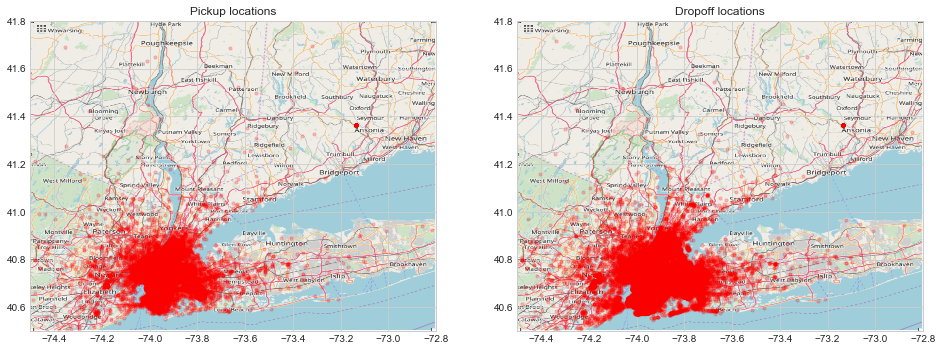

In [156]:
plot_on_map(df_train, BB, nyc_map)

# data point density per sq mile
to give a better view of the "hot spots"

In [162]:
# a function to calculate the distance in mile between location in lon, lat
# https://stackoverflow.com/questions/27928/
# https://dothinking.github.io/blog/2017/03/09/%E7%90%83%E9%9D%A2%E8%B7%9D%E7%A6%BB%E4%B8%8E%E6%96%B9%E4%BD%8D%E8%A7%92%E5%85%AC%E5%BC%8F%E7%9A%84%E6%8E%A8%E5%AF%BC-%E5%90%91%E9%87%8F%E4%BB%A3%E6%95%B0%E6%B3%95.html

def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a)) # 2*R*asin...

n_lon, n_lat = 200, 200 # the number of grid bin perlongtitude , latitude dimention
density_pickup, density_dropoff = np.zeros((n_lat, n_lon)), np.zeros((n_lat, n_lon))
# prepare the array


# calculate the number of datapoints in a grid area
# 分成两百份， 定义每份距离
bins_lon = np.zeros(n_lon+1) # bin
bins_lat = np.zeros(n_lat+1) # bin
delta_lon = (BB[1]-BB[0])/n_lon # bin longutide width
delta_lat = (BB[3]-BB[2])/n_lat # bin latitude height
bin_width_miles = distance(BB[2], BB[1], BB[2], BB[0])/n_lon # bin width in miles
bin_height_miles = distance(BB[3], BB[0], BB[2], BB[0])/n_lat # bin height in miles
# 定义每份的位置
for i in range(n_lon+1):
    bins_lon[i] = BB[0] + i* delta_lon
for j in range(n_lat+1):
    bins_lat[j] = BB[2] + j* delta_lat

# Digitize per longitude, latitude dimension
# numpy.digitize(x, bins, right=False)¶
#Return the indices of the bins to which each value in input array belongs.
# 用digitize把df_train data 分到bin_lon
inds_pickup_lon = np.digitize(df_train.pickup_longitude, bins_lon)
inds_pickup_lat = np.digitize(df_train.pickup_latitude, bins_lat)
inds_dropoff_lon = np.digitize(df_train.dropoff_longitude, bins_lon)
inds_dropoff_lat = np.digitize(df_train.dropoff_latitude, bins_lat)

dxdy = bin_width_miles*bin_height_miles
# Count per grid bin
for i in range(n_lon):
    for j in range(n_lat):
        density_pickup[j,i] = np.sum((inds_pickup_lon==i+1)&(inds_pickup_lat==(n_lat-j)))/dxdy
        density_dropoff[j,i] = np.sum((inds_dropoff_lon==i+1)&(inds_dropoff_lat==(n_lat-j)))/dxdy

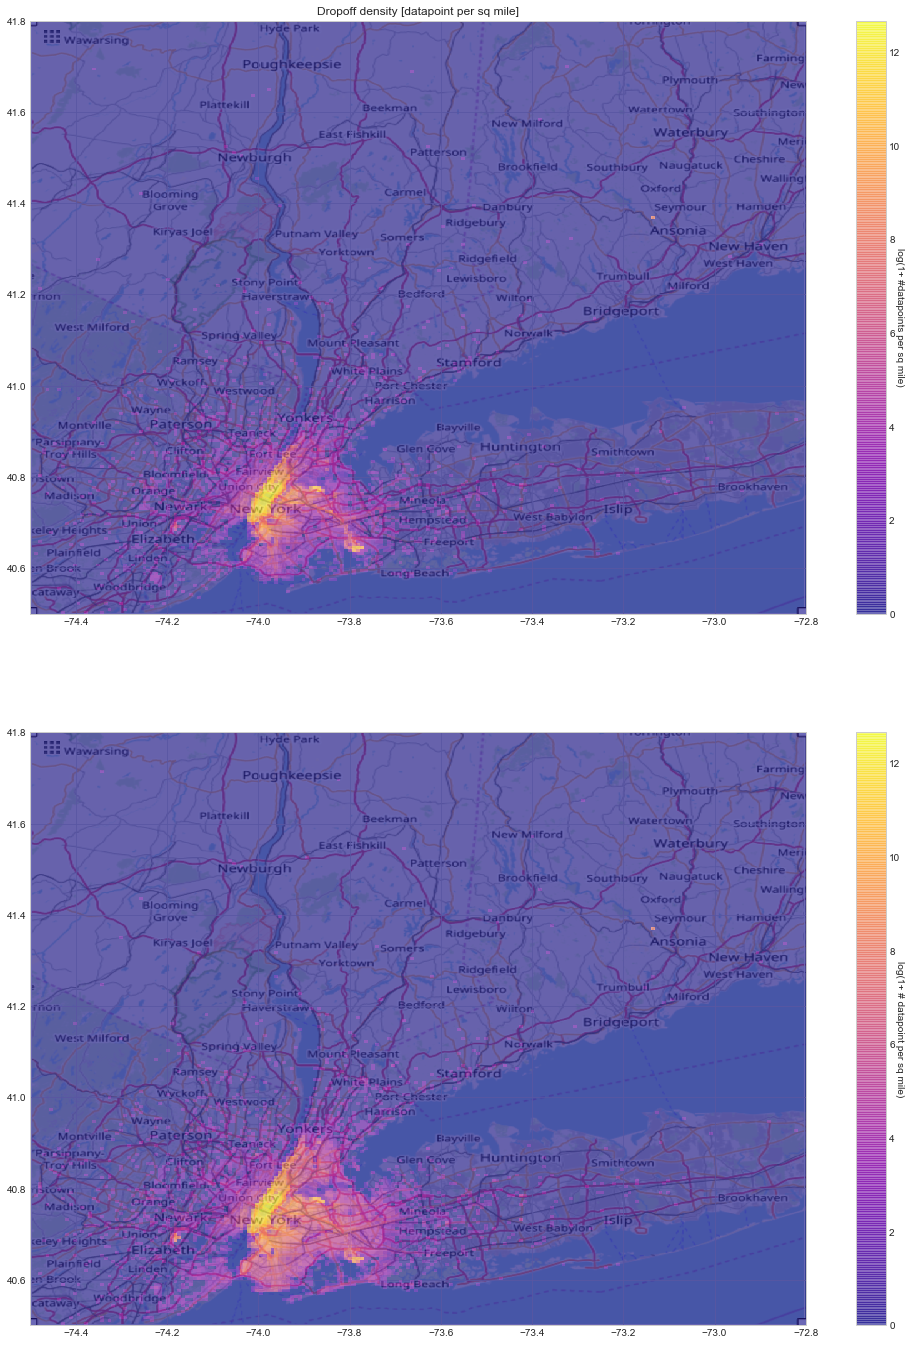

In [163]:
# Plot the density arrays
fig, axs = plt.subplots(2,1, figsize=(18, 24))
axs[0].imshow(nyc_map,zorder=0, extent=BB);
im = axs[0].imshow(np.log1p(density_pickup),zorder=1,extent=BB, alpha=0.6,cmap='plasma')
# numpy.log1p(x) ---> log(1+x)
axs[0].set_title('Pickup density [datapoint per sq mile]')
cbar = fig.colorbar(im, ax = axs[0])
cbar.set_label('log(1+ #datapoints per sq mile)', rotation=270)

axs[1].imshow(nyc_map,zorder=0, extent=BB);
im = axs[1].imshow(np.log1p(density_dropoff),zorder=1,extent=BB, alpha=0.6,cmap='plasma')
axs[0].set_title('Dropoff density [datapoint per sq mile]')
cbar = fig.colorbar(im, ax = axs[1])
cbar.set_label('log(1+ # datapoint per sq mile)',rotation = 270)

# Pickup traffic density

In [164]:
# add time information
df_train['year'] = df_train.pickup_datetime.apply(lambda t: t.year)
df_train['weekday'] = df_train.pickup_datetime.apply(lambda t: t.weekday())
df_train['hour'] = df_train.pickup_datetime.apply(lambda t: t.hour)
#print(df_train['year'])

In [165]:
#Basic content
n_hours = 24
n_weekdays = 7
n_years = 7
n_bins_lon = 30
n_bins_lat = 30

# focus on traffic in Manhattan
BB_traffic = (-74.025, -73.925, 40.7, 40.8)

# define function to calculate pickup traffic density
def calculate_trafic_density(df):
    traffic = np.zeros((n_years, n_weekdays, n_hours, n_bins_lat, n_bins_lon))
    bins_lon = np.zeros(n_bins_lon+1)
    bins_lat = np.zeros(n_bins_lat+1)
    
    delta_lon = (BB_traffic[1]-BB_traffic[0])/n_bins_lon
    delta_lat = (BB_traffic[3]-BB_traffic[2])/n_bins_lat
    
    for i in range(n_bins_lon+1):
        bins_lon[i] = BB_traffic[0]+i*delta_lon
    for j in range(n_bins_lat+1):
        bins_lat[j] = BB_traffic[2]+j*delta_lat
        
    for y in range(n_years):
        for d in range(n_weekdays):
            for h in range(n_hours):
                idx = (df.year==(2009+y))&(df.weekday==d) & (df.hour==h)
                # Digitize per longitude latitude dimention
                inds_pickup_lon = np.digitize(df[idx].pickup_longitude,bins_lon)
                inds_pickup_lat = np.digitize(df[idx].pickup_latitude,bins_lat)
                for i in range(n_bins_lon):
                    for j in range(n_bins_lat):
                        traffic[y,d,h,j,i]=traffic[y,d,h,j,i]+np.sum((inds_pickup_lon==i+1)&(inds_pickup_lat==j+1))
    return traffic

def plot_traffic(traffic,y,d):
    days = {'monday' : 0, 'tuesday' : 1, 'wednesday' : 2, 'thursday' : 3, 'friday' : 4, 'saturday' : 5, 'sunday' : 6}
    fig, axs = plt.subplots(3,8,figsize=(18,7))
    axs = axs.ravel()
    for h in range(24):
        axs[h].imshow(traffic[y-2009,days[d],h,::-1,:], zorder=1, cmap='coolwarm', clim=(0, traffic.max()))
        axs[h].get_xaxis().set_visible(False)
        axs[h].get_yaxis().set_visible(False)
        axs[h].set_title('h={}'.format(h))
    fig.suptitle("Pickup traffic density, year={}, day={} (max_pickups={})".format(y, d, traffic.max()))

In [166]:
traffic = calculate_trafic_density(df_train)

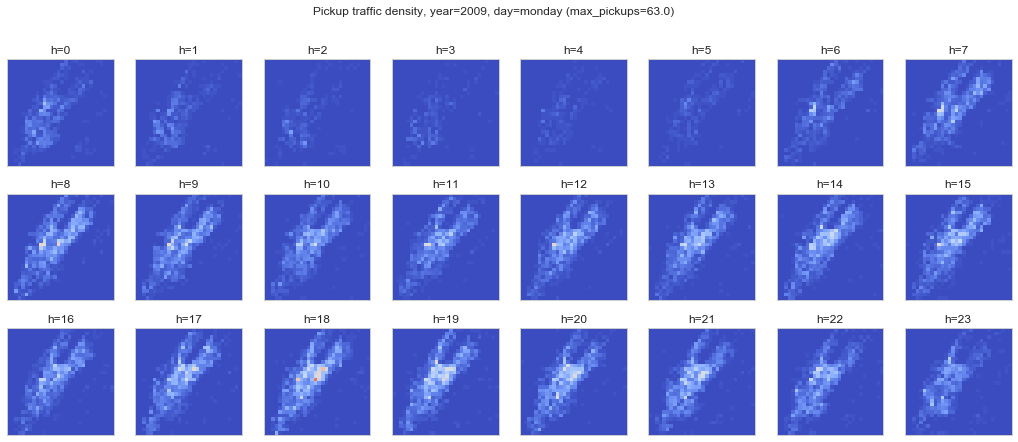

In [167]:
plot_traffic(traffic, 2009, 'monday')

# Distance and time visualisations

### The longer the distance between pickup, higher the pare

count    1.957530e+06
mean     2.068194e+00
std      2.345983e+00
min      0.000000e+00
25%      7.789321e-01
50%      1.337189e+00
75%      2.431893e+00
max      7.132624e+01
Name: distance_miles, dtype: float64

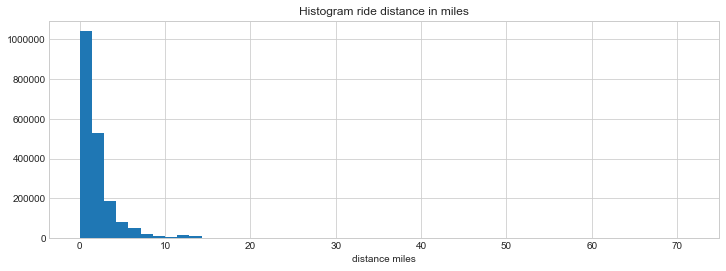

In [168]:
# add new column
df_train['distance_miles'] = distance(df_train.pickup_latitude,df_train.pickup_longitude,df_train.dropoff_latitude,df_train.dropoff_longitude)
df_train.distance_miles.hist(bins=50, figsize=(12,4))
plt.xlabel('distance miles')
plt.title('Histogram ride distance in miles')
df_train.distance_miles.describe()

### See the influence of passenger_count

In [169]:
df_train.groupby('passenger_count')['distance_miles','fare_amount'].mean()

distance_miles  fare_amount
passenger_count                             
0                      1.732107     8.813325
1                      2.040013    11.202837
2                      2.179313    11.800007
3                      2.100634    11.519105
4                      2.132165    11.721121
5                      2.072168    11.215987
6                      2.122414    12.169590
9                      8.106351   104.000000

In [170]:
print("Average $USD/Mile : {:0.2f}".format(df_train.fare_amount.sum()/df_train.distance_miles.sum()))

Average $USD/Mile : 5.48


Text(0.5,1,'Zoom in the distance<15mile, fare < 100$')

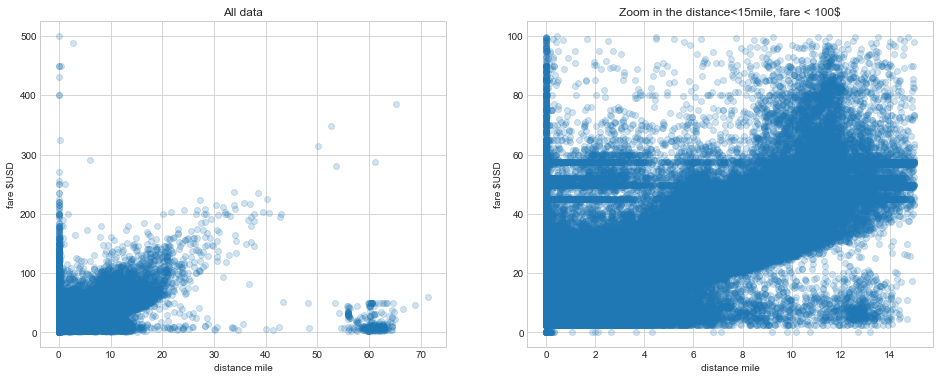

In [171]:
fig, axs = plt.subplots(1,2,figsize=(16,6))
axs[0].scatter(df_train.distance_miles, df_train.fare_amount,alpha=0.2)
axs[0].set_xlabel('distance mile')
axs[0].set_ylabel('fare $USD')
axs[0].set_title('All data')

#zoom in part of data
idx = (df_train.distance_miles<15) & (df_train.fare_amount<100)
axs[1].scatter(df_train[idx].distance_miles,df_train[idx].fare_amount,alpha=0.2)
axs[1].set_xlabel('distance mile')
axs[1].set_ylabel('fare $USD')
axs[1].set_title('Zoom in the distance<15mile, fare < 100$')

In [172]:
# remove datapoint with distance < 0.05mile
idx = (df_train.distance_miles>=0.05)
print("old size %d" %len(df_train))
df_train = df_train[idx]
print("New size %d" %len(df_train))


old size 1957530
New size 1926254


### Some trips, like to airport are fix distance


In [173]:
#JFK airport
jfk = (-73.7822222222, 40.6441666667)
nyc = (-74.0063889, 40.7141667)

def plot_location_fare(loc, name, range=1.5):
    fig,axs = plt.subplots(1,2,figsize=(14,5))
    idx = (distance(df_train.pickup_latitude, df_train.pickup_longitude,loc[1],loc[0])<range)
    df_train[idx].fare_amount.hist(bins=100,ax=axs[0])
    axs[0].set_xlabel('fare $USD')
    axs[0].set_title('Histogram pickup location within {} mile of {}'.format(range,name))
    
    idx = (distance(df_train.dropoff_latitude, df_train.dropoff_longitude,loc[1],loc[0])<range)
    df_train[idx].fare_amount.hist(bins=100,ax=axs[1])
    axs[1].set_xlabel('fare $USD')
    axs[1].set_title('Histogram dropoff location within {} mile of {}'.format(range,name))

#plot_location_fare(jfk, 'JFK Airport')
    

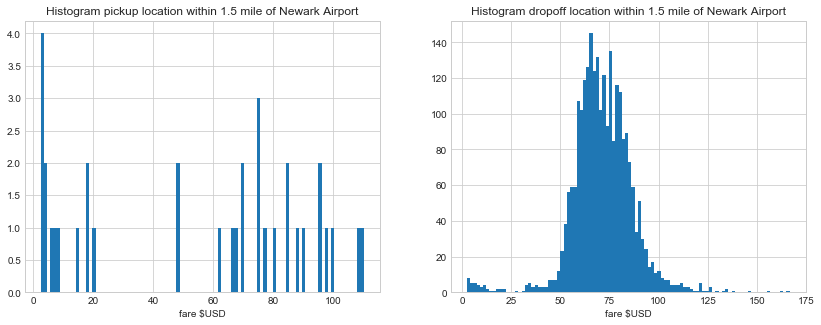

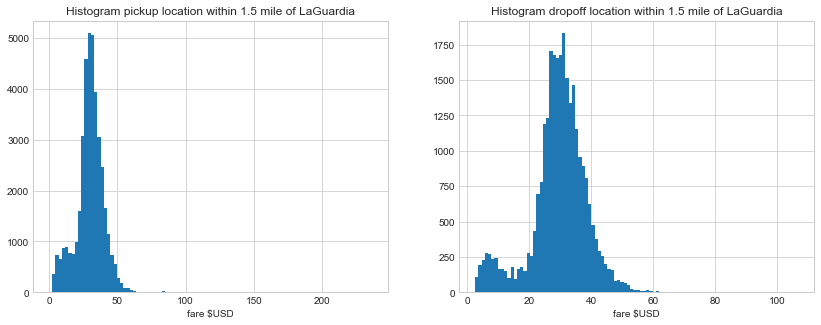

In [174]:
ewr = (-74.175, 40.69)
lgr = (-73.87, 40.77)
plot_location_fare(ewr, "Newark Airport")
plot_location_fare(lgr, "LaGuardia")

# Fare at night is different from day time

In [175]:
df_train['fare_per_mile']= df_train.fare_amount/df_train.distance_miles
df_train.fare_per_mile.describe()

count    1.926254e+06
mean     7.419784e+00
std      1.231459e+01
min      0.000000e+00
25%      4.770449e+00
50%      6.133819e+00
75%      8.085931e+00
max      3.812572e+03
Name: fare_per_mile, dtype: float64

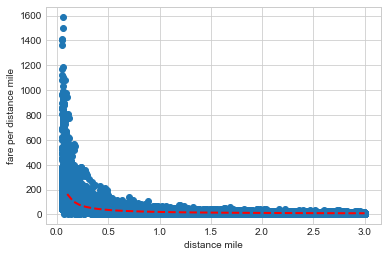

In [176]:
idx = (df_train.distance_miles < 3) & (df_train.fare_amount < 100)
plt.scatter(df_train[idx].distance_miles, df_train[idx].fare_per_mile)
plt.xlabel('distance mile')
plt.ylabel('fare per distance mile')

# estimate a theta
theta = (16,4.0)
x = np.linspace(0.1,3,50)
plt.plot(x,theta[0]/x+theta[1],'--',c = 'r',lw = 2)#找一条曲线线性回归

Text(0,0.5,'Fare $USD /mile')

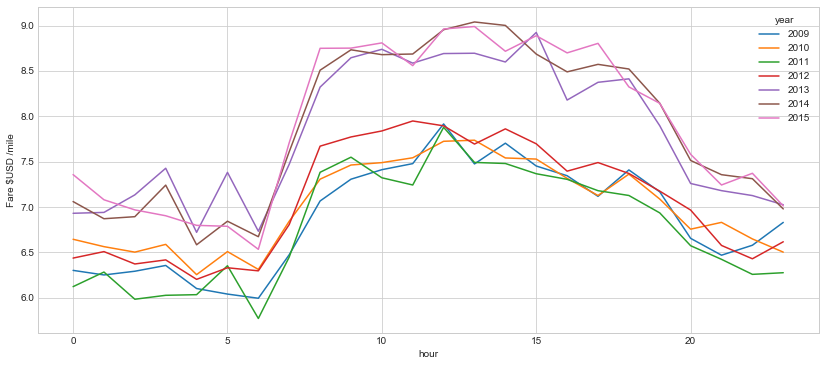

In [177]:
# display
df_train.pivot_table('fare_per_mile',index='hour',columns='year').plot(figsize=(14,6))
plt.ylabel('Fare $USD /mile')

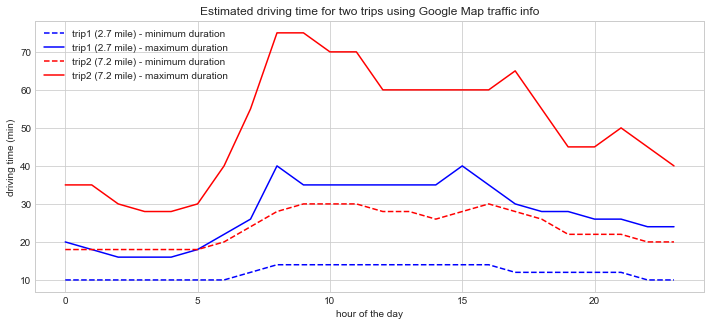

In [178]:
hours = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, \
         13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]

# minimum & maximum duration in minutes
trip1_min = [10, 10, 10, 10, 10, 10, 10, 12, 14, 14, 14, 14, \
             14, 14, 14, 14, 14, 12, 12, 12, 12, 12, 10, 10]
trip1_max = [20, 18, 16, 16, 16, 18, 22, 26, 40, 35, 35, 35, \
             35, 35, 35, 40, 35, 30, 28, 28, 26, 26, 24, 24]

trip2_min = [18, 18, 18, 18, 18, 18, 20, 24, 28, 30, 30, 30, \
             28, 28, 26, 28, 30, 28, 26, 22, 22, 22, 20, 20]
trip2_max = [35, 35, 30, 28, 28, 30, 40, 55, 75, 75, 70, 70, \
             60, 60, 60, 60, 60, 65, 55, 45, 45, 50, 45, 40]

plt.figure(figsize=(12, 5))
plt.plot(hours, trip1_min, '--', c='b', label="trip1 (2.7 mile) - minimum duration")
plt.plot(hours, trip1_max, '-', c='b', label="trip1 (2.7 mile) - maximum duration")
plt.plot(hours, trip2_min, '--', c='r', label="trip2 (7.2 mile) - minimum duration")
plt.plot(hours, trip2_max, '-', c='r', label="trip2 (7.2 mile) - maximum duration")
plt.xlabel('hour of the day')
plt.ylabel('driving time (min)')
plt.title('Estimated driving time for two trips using Google Map traffic info')
plt.legend();

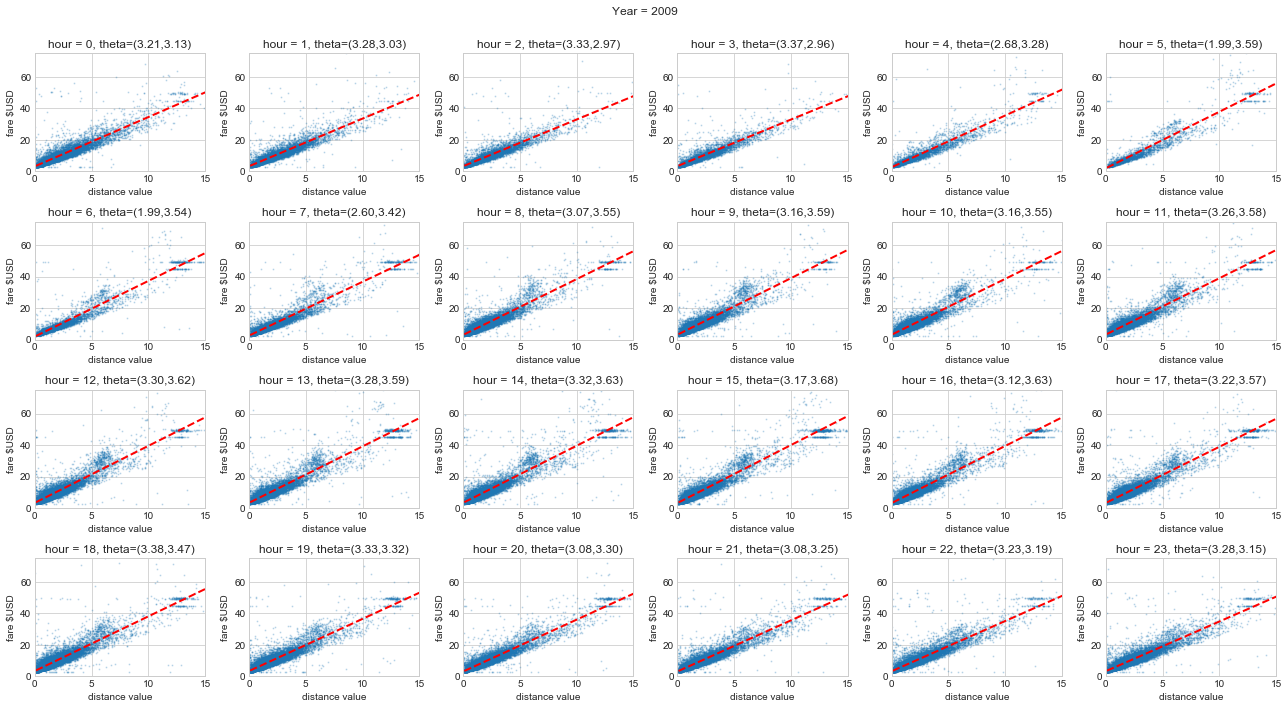

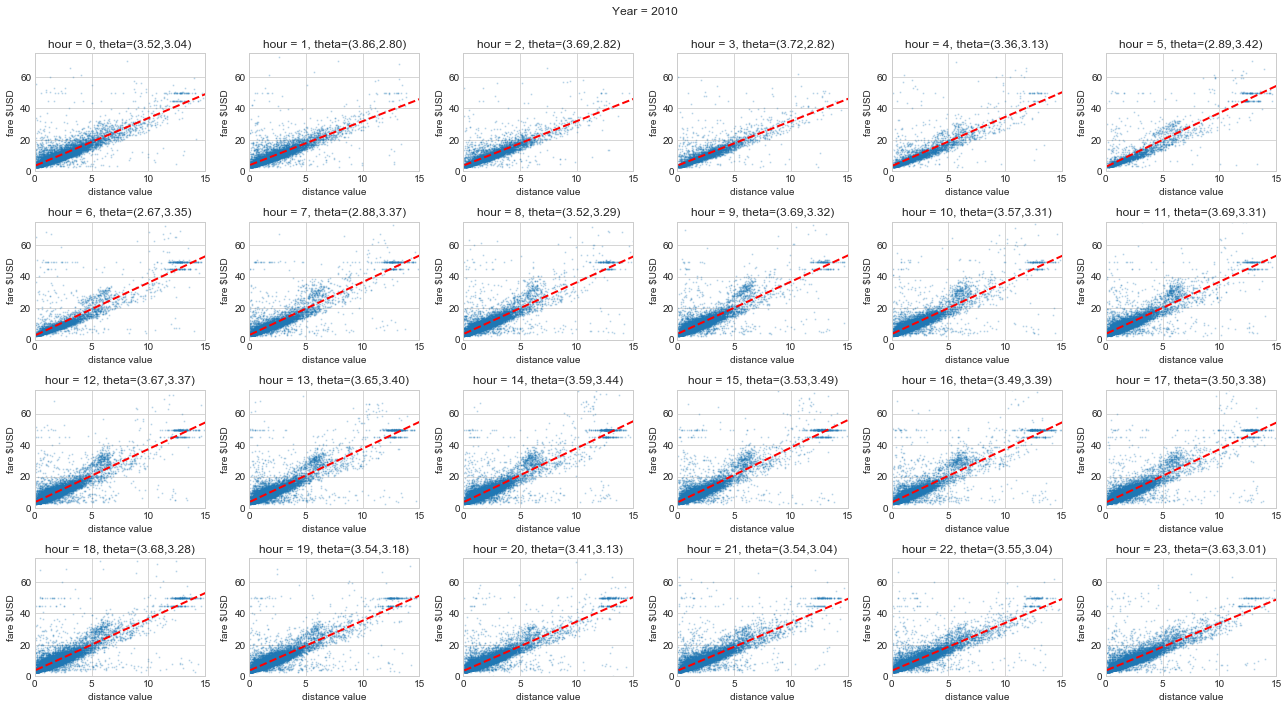

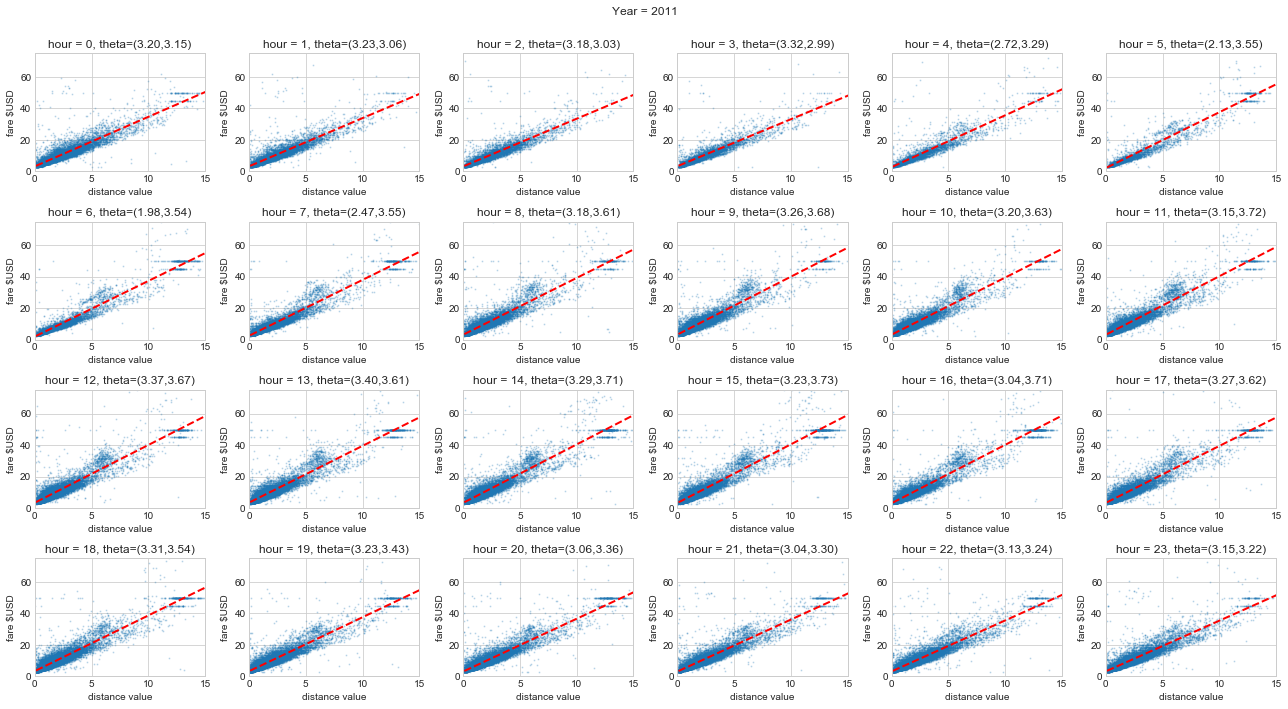

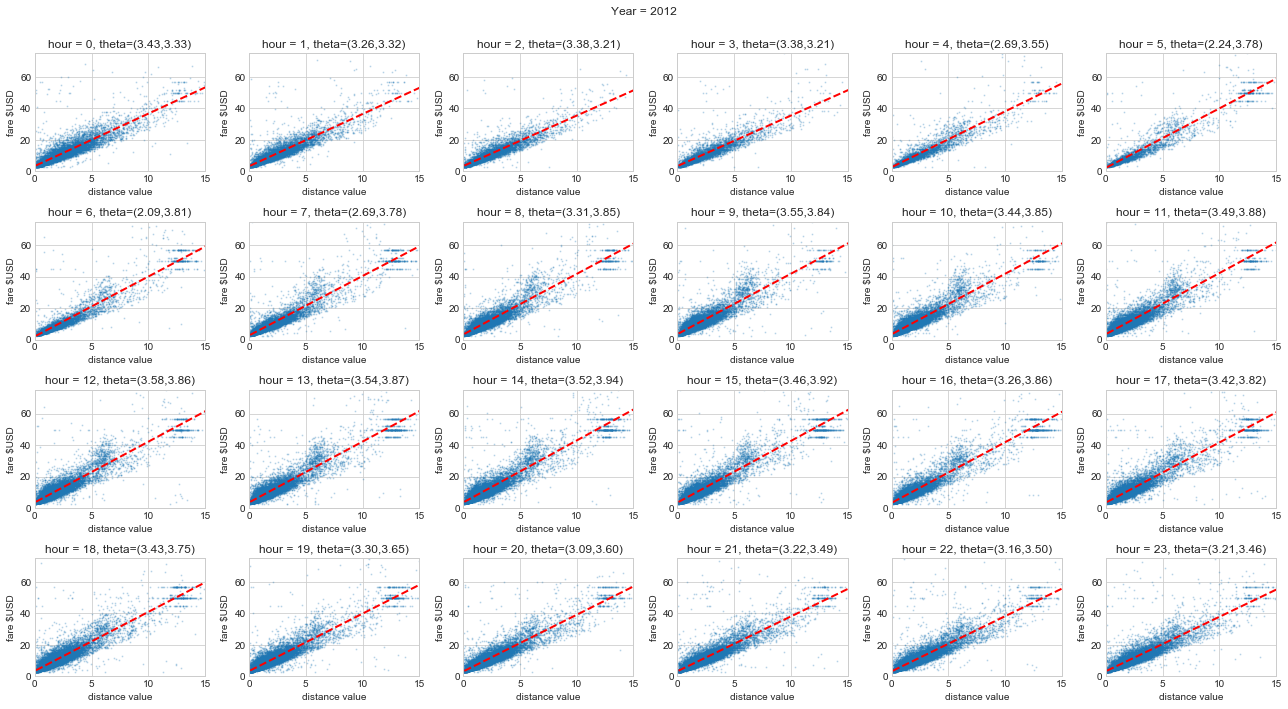

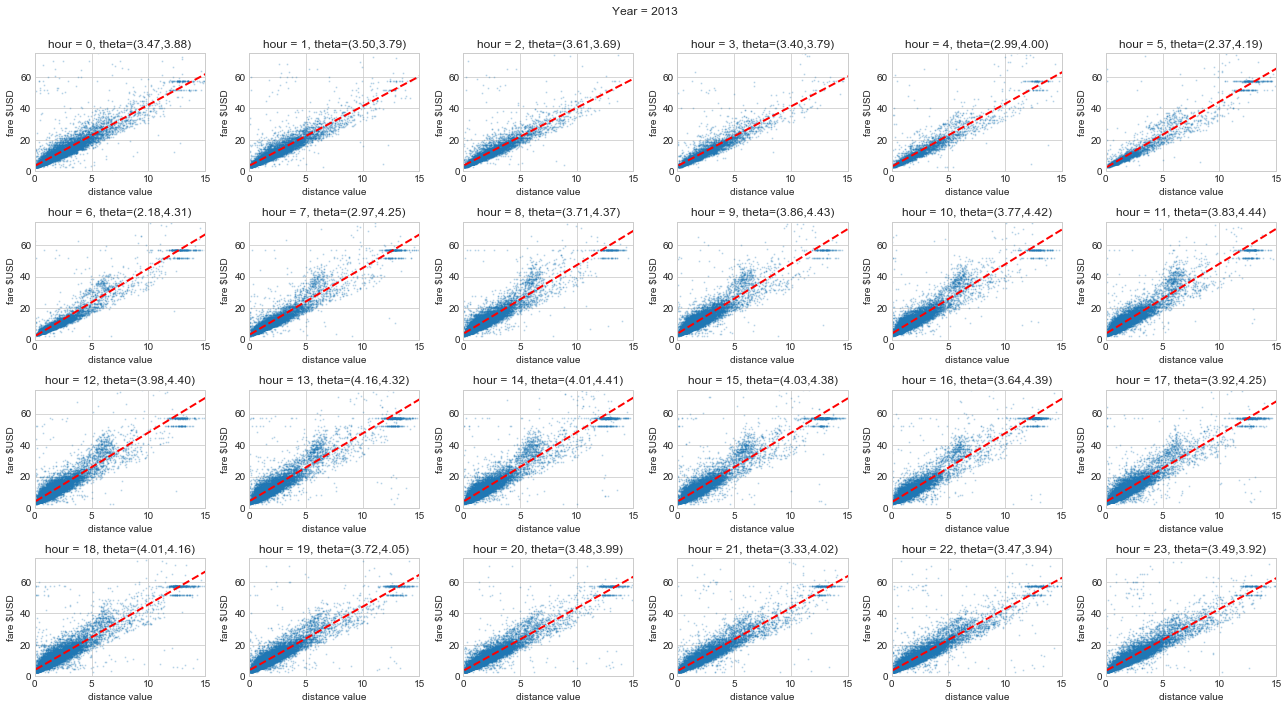

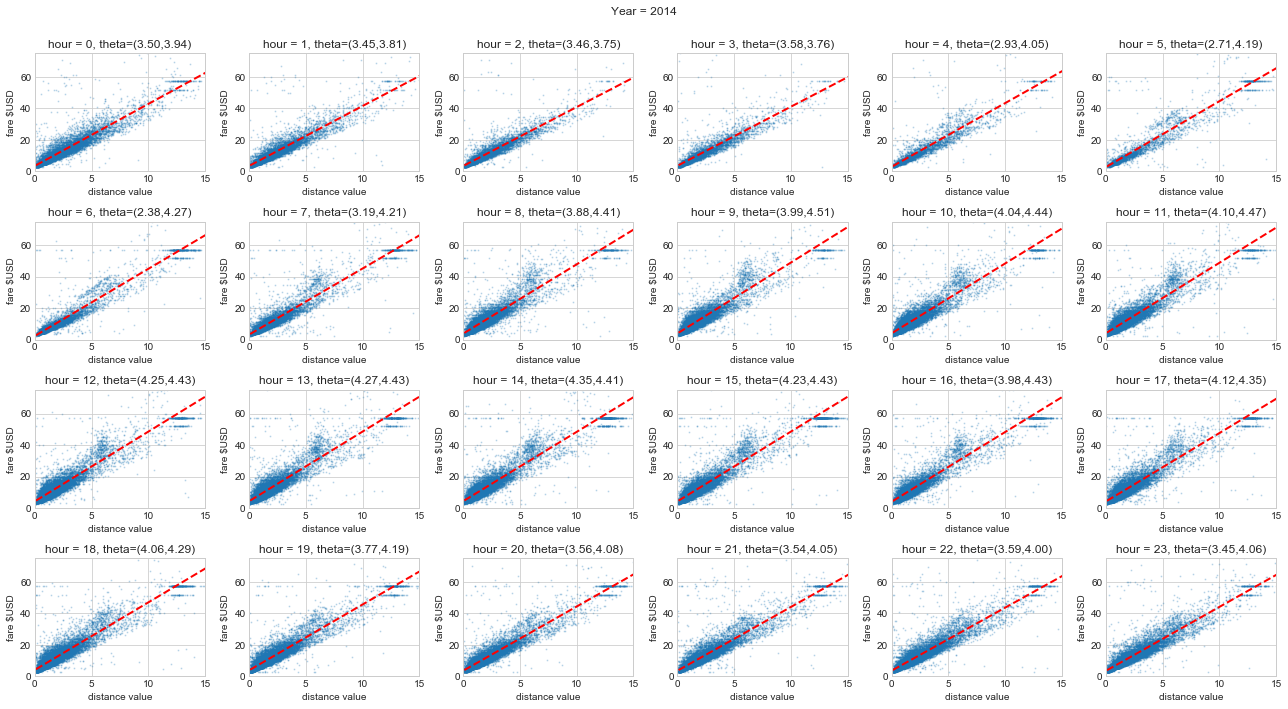

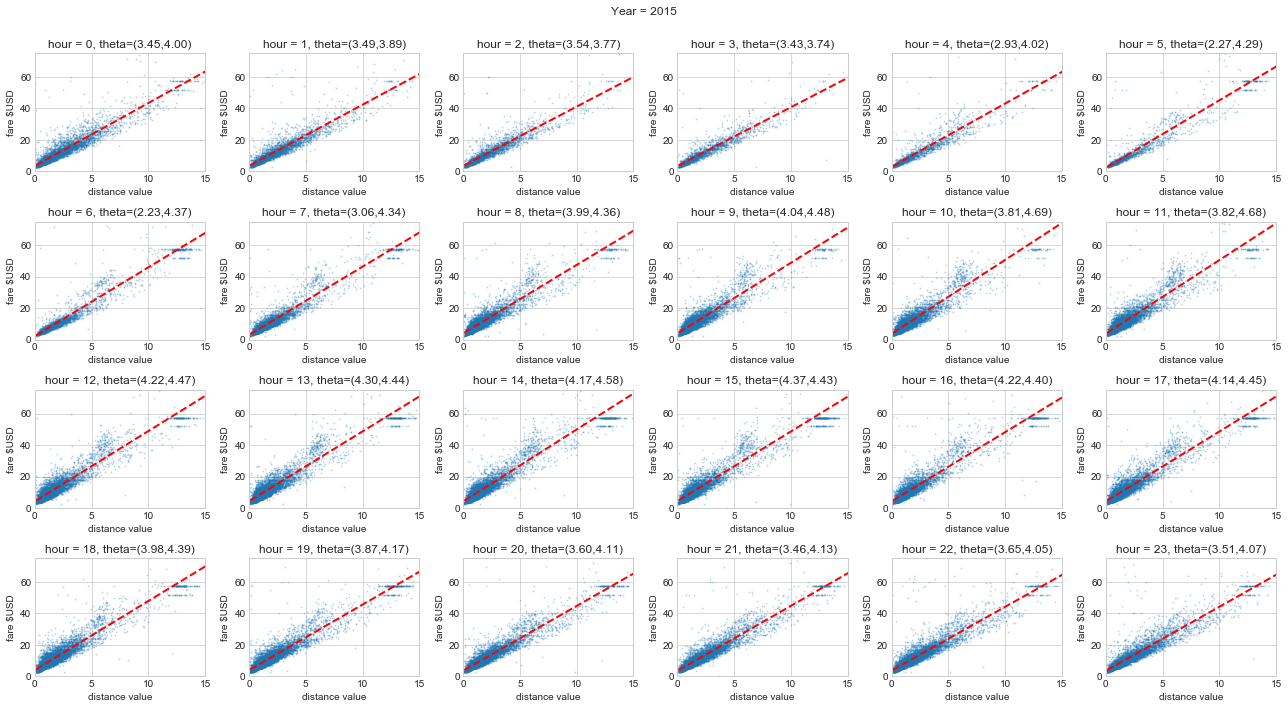

In [179]:
# calculate per year/per hour, liner regression
from sklearn.linear_model import LinearRegression
for year in df_train.year.unique():
    fig, axs = plt.subplots(4,6,figsize=(18,10))
    axs = axs.ravel()
    for h in range(24):
        idx = (df_train.distance_miles<15)&(df_train.fare_amount<100)&(df_train.hour==h)&(df_train.year == year)
        axs[h].scatter(df_train[idx].distance_miles,df_train[idx].fare_amount,alpha=0.2,s=1)
        axs[h].set_xlabel('distance value')
        axs[h].set_ylabel('fare $USD')
        axs[h].set_xlim((0,15))
        axs[h].set_ylim((0,75))
        
        model = LinearRegression(fit_intercept=False)
        #This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm. 
        x,y = df_train[idx].distance_miles.values.reshape(-1,1), df_train[idx].fare_amount.values.reshape(-1,1)
        X = np.concatenate((np.ones(x.shape), x), axis=1)
        model.fit(X, y)
        xx = np.linspace(0.1, 25, 100)
        axs[h].plot(xx, model.coef_[0][0] + xx * model.coef_[0][1], '--', c='r', lw=2)
        axs[h].set_title('hour = {}, theta=({:0.2f},{:0.2f})'.format(h, model.coef_[0][0], model.coef_[0][1]))

    plt.suptitle("Year = {}".format(year))
    plt.tight_layout(rect=[0, 0, 1, 0.95]);

In [180]:
# add new column to dataframe with distance in mile
df_train['distance_to_center'] = distance(nyc[1], nyc[0], df_train.pickup_latitude, df_train.pickup_longitude)

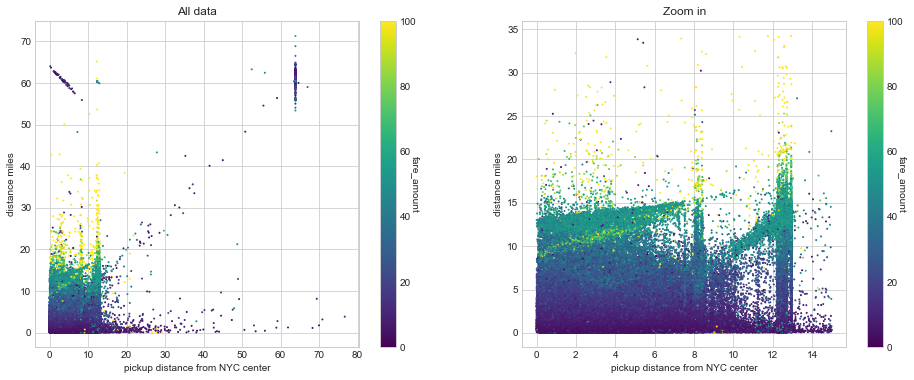

In [181]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))
im = axs[0].scatter(df_train.distance_to_center, df_train.distance_miles, c=np.clip(df_train.fare_amount, 0, 100), 
                     cmap='viridis', alpha=1.0, s=1)
axs[0].set_xlabel('pickup distance from NYC center')
axs[0].set_ylabel('distance miles')
axs[0].set_title('All data')
cbar = fig.colorbar(im, ax=axs[0])
cbar.ax.set_ylabel('fare_amount', rotation=270)

idx = (df_train.distance_to_center < 15) & (df_train.distance_miles < 35)
im = axs[1].scatter(df_train[idx].distance_to_center, df_train[idx].distance_miles, 
                     c=np.clip(df_train[idx].fare_amount, 0, 100), cmap='viridis', alpha=1.0, s=1)
axs[1].set_xlabel('pickup distance from NYC center')
axs[1].set_ylabel('distance miles')
axs[1].set_title('Zoom in')
cbar = fig.colorbar(im, ax=axs[1])
cbar.ax.set_ylabel('fare_amount', rotation=270);

In [182]:
df_train['pickup_distance_to_jfk'] = distance(jfk[1], jfk[0], df_train.pickup_latitude, df_train.pickup_longitude)
df_train['dropoff_distance_to_jfk'] = distance(jfk[1], jfk[0], df_train.dropoff_latitude, df_train.dropoff_longitude)

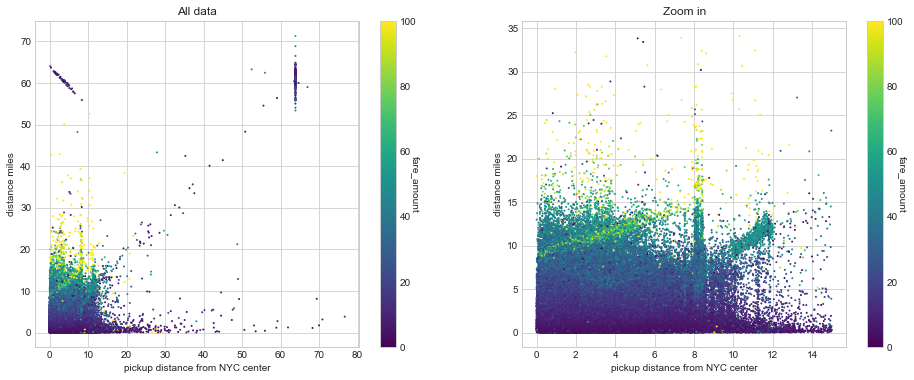

In [183]:
# remove all to/from JFK trips
idx = ~((df_train.pickup_distance_to_jfk < 1) | (df_train.dropoff_distance_to_jfk < 1))

fig, axs = plt.subplots(1, 2, figsize=(16,6))
im = axs[0].scatter(df_train[idx].distance_to_center, df_train[idx].distance_miles, 
                    c=np.clip(df_train[idx].fare_amount, 0, 100), 
                     cmap='viridis', alpha=1.0, s=1)
axs[0].set_xlabel('pickup distance from NYC center')
axs[0].set_ylabel('distance miles')
axs[0].set_title('All data')
cbar = fig.colorbar(im, ax=axs[0])
cbar.ax.set_ylabel('fare_amount', rotation=270)

idx1 = idx & (df_train.distance_to_center < 15) & (df_train.distance_miles < 35)
im = axs[1].scatter(df_train[idx1].distance_to_center, df_train[idx1].distance_miles, 
                     c=np.clip(df_train[idx1].fare_amount, 0, 100), cmap='viridis', alpha=1.0, s=1)
axs[1].set_xlabel('pickup distance from NYC center')
axs[1].set_ylabel('distance miles')
axs[1].set_title('Zoom in')
cbar = fig.colorbar(im, ax=axs[1])
cbar.ax.set_ylabel('fare_amount', rotation=270);

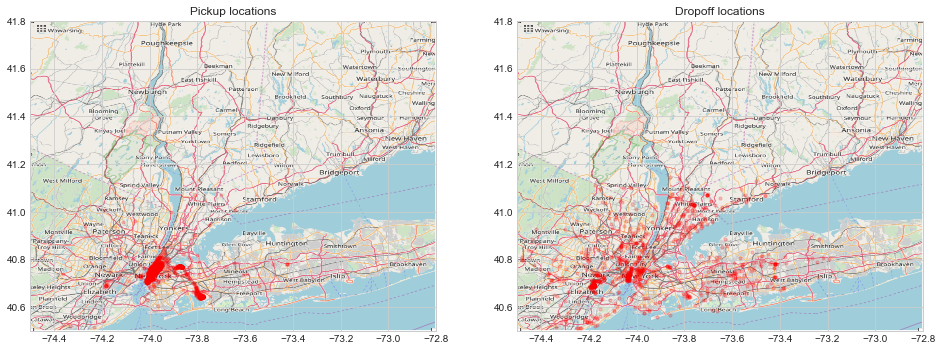

In [184]:
idx = (df_train.fare_amount>80) & (df_train.distance_miles<35) 
plot_on_map(df_train[idx], BB, nyc_map)

In [185]:
df_train['pickup_distance_to_ewr'] = distance(ewr[1], ewr[0], df_train.pickup_latitude, df_train.pickup_longitude)
df_train['dropoff_distance_to_ewr'] = distance(ewr[1], ewr[0], df_train.dropoff_latitude, df_train.dropoff_longitude)
df_train['pickup_distance_to_lgr'] = distance(lgr[1], lgr[0], df_train.pickup_latitude, df_train.pickup_longitude)
df_train['dropoff_distance_to_lgr'] = distance(lgr[1], lgr[0], df_train.dropoff_latitude, df_train.dropoff_longitude)

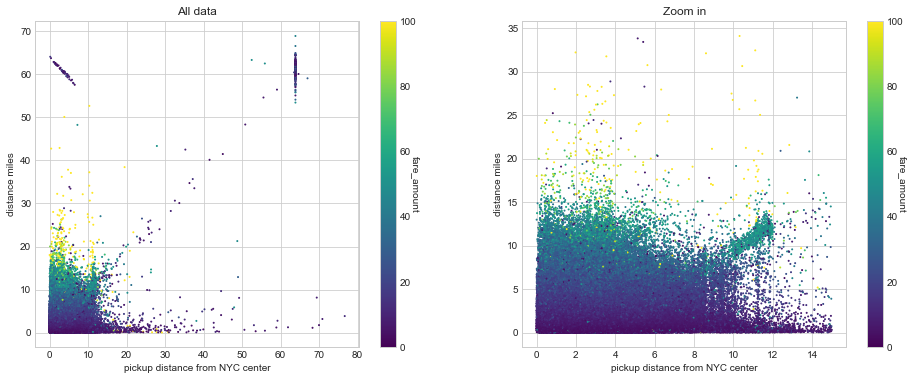

In [186]:
# remove all to/from airport trips
idx = ~((df_train.pickup_distance_to_jfk < 1) | (df_train.dropoff_distance_to_jfk < 1) |
        (df_train.pickup_distance_to_ewr < 1) | (df_train.dropoff_distance_to_ewr < 1) |
        (df_train.pickup_distance_to_lgr < 1) | (df_train.dropoff_distance_to_lgr < 1))

fig, axs = plt.subplots(1, 2, figsize=(16,6))
im = axs[0].scatter(df_train[idx].distance_to_center, df_train[idx].distance_miles, 
                    c=np.clip(df_train[idx].fare_amount, 0, 100), 
                     cmap='viridis', alpha=1.0, s=1)
axs[0].set_xlabel('pickup distance from NYC center')
axs[0].set_ylabel('distance miles')
axs[0].set_title('All data')
cbar = fig.colorbar(im, ax=axs[0])
cbar.ax.set_ylabel('fare_amount', rotation=270)

idx1 = idx & (df_train.distance_to_center < 15) & (df_train.distance_miles < 35)
im = axs[1].scatter(df_train[idx1].distance_to_center, df_train[idx1].distance_miles, 
                     c=np.clip(df_train[idx1].fare_amount, 0, 100), cmap='viridis', alpha=1.0, s=1)
axs[1].set_xlabel('pickup distance from NYC center')
axs[1].set_ylabel('distance miles')
axs[1].set_title('Zoom in')
cbar = fig.colorbar(im, ax=axs[1])
cbar.ax.set_ylabel('fare_amount', rotation=270);

Relevance of direction

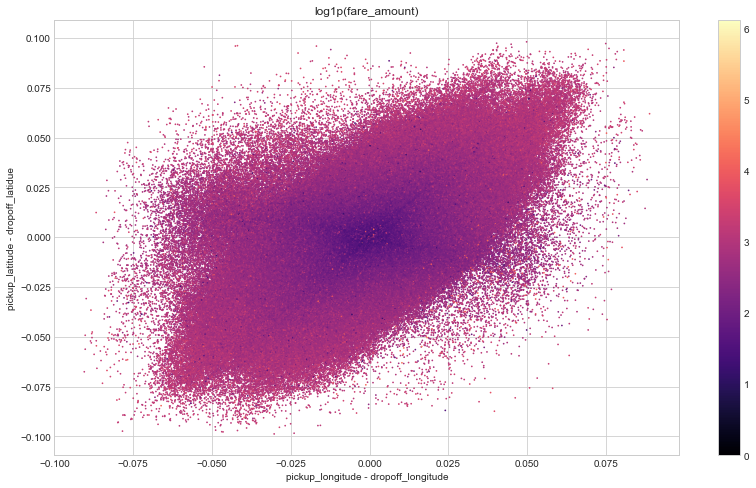

In [187]:
df_train['delta_lon'] = df_train.pickup_longitude - df_train.dropoff_longitude
df_train['delta_lat'] = df_train.pickup_latitude - df_train.dropoff_latitude

# Select trips in Manhattan
BB_manhattan = (-74.025, -73.925, 40.7, 40.8)
idx_manhattan = select_within_boundingbox(df_train, BB_manhattan)

plt.figure(figsize=(14,8))
plt.scatter(df_train[idx_manhattan].delta_lon, df_train[idx_manhattan].delta_lat, s=0.5, alpha=1.0, 
            c=np.log1p(df_train[idx_manhattan].fare_amount), cmap='magma')
plt.colorbar()
plt.xlabel('pickup_longitude - dropoff_longitude')
plt.ylabel('pickup_latitude - dropoff_latidue')
plt.title('log1p(fare_amount)');


Text(0,0.5,'average fare amnount &USD')

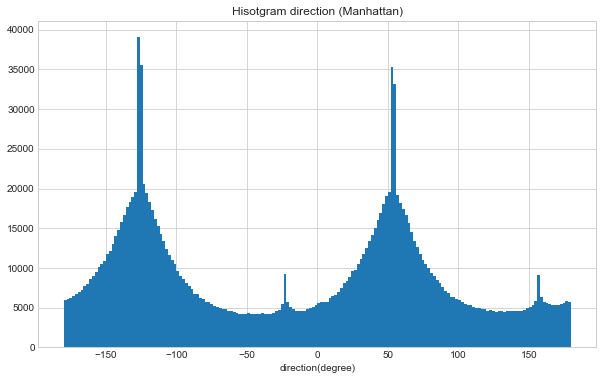

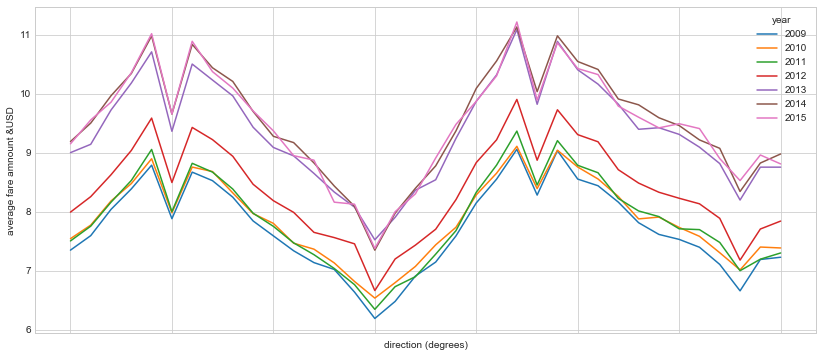

In [188]:
def calculate_direction(d_lon,d_lat):
    result = np.zeros(len(d_lon))
    l = np.sqrt(d_lon**2+d_lat**2)
    result[d_lon>0] = (180/np.pi)*np.arcsin(d_lat[d_lon>0]/l[d_lon>0])
    
    idx = (d_lon<0)&(d_lat>0)
    result[idx] = 180-(180/np.pi)*np.arcsin(d_lat[idx]/l[idx])
    
    idx = (d_lon<0)&(d_lat<0)
    result[idx] = -180-(180/np.pi)*np.arcsin(d_lat[idx]/l[idx])
    return result

df_train['direction'] =calculate_direction(df_train.delta_lon,df_train.delta_lat)

#plot hidtogram of directions
plt.figure(figsize=(10,6))
df_train[idx_manhattan].direction.hist(bins=180)

# 把
plt.xlabel('direction(degree)')
plt.title('Hisotgram direction (Manhattan)')

#plot direction vs average fare amount
fig,ax = plt.subplots(1,1,figsize=(14,6))
direct = pd.cut(df_train[idx_manhattan]['direction'],np.linspace(-180,180,37))
# 把df_train[idx_manhattan]均匀分布在-180~180之间, 每隔10为一组
df_train[idx_manhattan].pivot_table('fare_amount',index=[direct],columns='year',aggfunc='mean').plot(ax=ax)
# 通过数据透视表计算平均值
# pivot index can be :column, Grouper, array, or list of the previous
plt.xlabel('direction (degrees)')
#xticks(locs, [labels], **kwargs)  Set locations and labels
plt.ylabel('average fare amnount &USD')

Text(0,0.5,'average fare amount $USD')

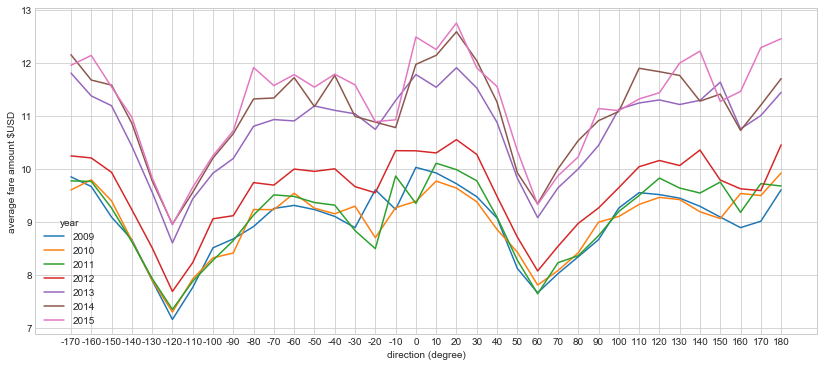

In [189]:
# select trips in Manhattan with +/- 2 miles distance drive
idx2 = idx_manhattan&(df_train.distance_miles>1.5)&(df_train.distance_miles<1.7)
#plot direction with average fare amount
fig,ax = plt.subplots(1,1,figsize=(14,6))
direc = pd.cut(df_train[idx2]['direction'],np.linspace(-180,180,37))
df_train[idx2].pivot_table('fare_amount',index=[direc],columns = 'year',aggfunc='mean').plot(ax=ax)
plt.xlabel('direction (degree)')
plt.xticks(range(36),np.arange(-170,190,10))
plt.ylabel('average fare amount $USD')
               

From the graph, the fare for direction=60 or -120 are the lowest
means in these directions distance can always be larger

Can also estimate the Manhattan distance meansure using the method in: https://www.kaggle.com/ojones3/feature-engineering-corrected-manhattan-distance


# Generate Kaggle baseline model and submission


In [190]:
# add new column to dataframe with the distance in km
df_test['distance_miles'] = distance(df_test.pickup_latitude, df_test.pickup_longitude, df_test.dropoff_latitude,df_test.dropoff_longitude)
df_test['distance_to_center'] = distance(nyc[0],nyc[1],df_test.dropoff_latitude, df_test.dropoff_longitude)
# ???? why its the dropoff_latitude the longitude in the ????

df_test['year'] = df_test.pickup_datetime.apply(lambda t: pd.to_datetime(t).year)
df_test['hour'] = df_test.pickup_datetime.apply(lambda t: pd.to_datetime(t).hour)

## model

base on the analysis above, start the following model
- fare ~ year, hour, distance, passenger_count

(no direction???)

using linear regression model
    

In [191]:
# define dataset
idx = (df_train.distance_to_center<15)&(df_train.passenger_count!=0)
features = ['year','hour','distance_miles','passenger_count']
X= df_train[idx][features].values # for generate array
y= df_train[idx]['fare_amount'].values

In [192]:
X.shape, y.shape

((1918622, 4), (1918622,))

In [193]:
from sklearn.metrics import mean_squared_error, explained_variance_score

def plot_prediction_analysis(y, y_pred, figsize=(10,4),title=''):
    fig,axs = plt.subplots(1,2,figsize = figsize)
    axs[0].scatter(y,y_pred)
    mn = min(np.min(y),np.min(y_pred))
    mx = max(np.max(y),np.max(y_pred))
    axs[0].plot([mn,mx],[mn,mx],c='red')
    axs[0].set_xlabel('$y$')
    axs[0].set_ylabel('$\hat{y}$')
    rmse = np.sqrt(mean_squared_error(y,y_pred))
    evs = explained_variance_score(y,y_pred)
    #Best possible evs score is 1.0, lower values are worse.
    axs[0].set_title('rmse = {:.2f}, evs = {:.2f}'.format(rmse,evs))
    
    axs[1].hist(y-y_pred,bins=50)#
    avg = np.mean(y-y_pred)
    std = np.std(y-y_pred)
    axs[1].set_xlabel('$y - \hat{y}$')
    axs[1].set_title('Histogram prediction error, $\mu$ = {:.2f},$\sigma$ = {:.2f}'.format(avg,std))
    
    if title !='':
        fig.suptitle(title)
    
    


In [194]:
# create training and test sets
from sklearn.model_selection import train_test_split
# 给定数据集X和类别标签y，将数据集按一定比例随机切分为训练集和测试集。
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

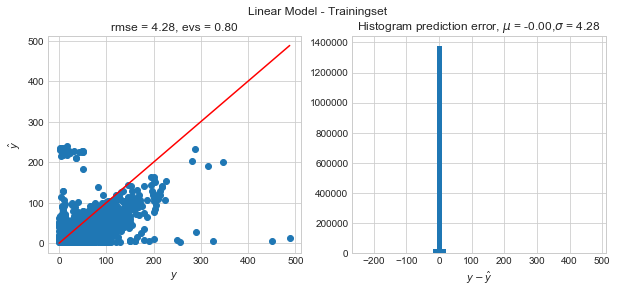

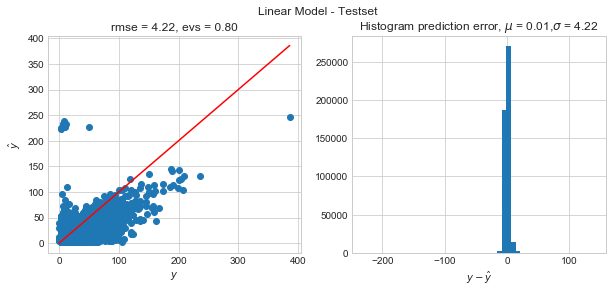

In [195]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

model_lin = Pipeline((
        ("standard_scaler", StandardScaler()),
        ("lin_reg", LinearRegression()),
    ))
model_lin.fit(X_train, y_train)

y_train_pred = model_lin.predict(X_train)
plot_prediction_analysis(y_train, y_train_pred, title='Linear Model - Trainingset')

y_test_pred = model_lin.predict(X_test)
plot_prediction_analysis(y_test, y_test_pred, title='Linear Model - Testset')

In [196]:
# 随机选取N次训练集和测试集，测试model的敏感度
# some handy function to see how sensitive the model is to the selection
# of the training and test set
def plot_rmse_analysis(model, X, y, N=400, test_size=0.25, figsize=(10,4), title=''):
    rmse_train, rmse_test = [], []
    for i in range(N):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        rmse_train.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
        rmse_test.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

    g = sns.jointplot(np.array(rmse_train), np.array(rmse_test), kind='scatter', stat_func=None, size=5)
    #Draw a plot of two variables with bivariate and univariate graphs
    g.set_axis_labels("RMSE training ($\mu$={:.2f})".format(np.mean(rmse_train)), 
                      "RMSE test ($\mu$={:.2f})".format(np.mean(rmse_test)))
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle('{} (N={}, test_size={:0.2f})'.format(title, N, test_size))


/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


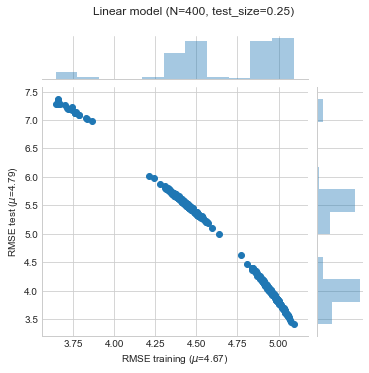

In [197]:
# only 100k points are used to shorten calculation time
plot_rmse_analysis(model_lin, X[:10000:], y[:10000], title='Linear model')

# kaggle submission

In [198]:
# define dataset
XTEST = df_test[features].values

In [199]:
filename = './output/baseline_linear'

y_pred_final = model_lin.predict(XTEST)

submission = pd.DataFrame(
    {'key': df_test.key, 'fare_amount': y_pred_final},
    columns = ['key', 'fare_amount'])
submission.to_csv('submission.csv', index = False)

In [200]:
submission

key  fare_amount
0     08:24.0    10.515388
1     08:24.0    10.733566
2     53:44.0     4.916026
3     12:12.0     8.263926
4     12:12.0    15.586012
5     12:12.0    10.959842
6     10:20.0     5.579537
7     10:20.0    49.625078
8     10:20.0    11.871764
9     22:20.0     7.409034
10    22:20.0    10.011721
11    22:20.0    15.357522
12    20:32.0     4.639246
13    20:32.0     6.675493
14    59:12.0     8.953638
15    59:12.0    14.534192
16    45:04.0     4.717007
17    45:04.0     9.487550
18    45:04.0     5.746221
19    45:04.0     4.991497
20    09:56.0     8.602690
21    39:00.0     9.269121
22    39:00.0     7.850617
23    39:00.0     9.123981
24    39:00.0    17.412347
25    39:00.0     7.457925
26    39:00.0    35.634533
27    39:00.0    25.208603
28    39:00.0     7.506740
29    39:00.0    15.097181
...       ...          ...
9884  00:00.0    37.265898
9885  00:00.0    15.653860
9886  00:00.0    20.719752
9887  00:00.0     8.547081
9888  00:00.0     4.955307
9889  00:00.0    10.036604
9890  00:00.0    11.248005
9891  00:00.0    17.676784
9892  00:00.0    11.260356
9893  00:00.0    15.075011
9894  00:00.0    11.583051
9895  00:00.0    24.189394
9896  00:00.0    10.080283
9897  08:29.0    16.805920
9898  36:37.0     7.128645
9899  38:14.0    17.947657
9900  56:22.0     9.975969
9901  56:54.0     9.216111
9902  01:46.0    14.273069
9903  02:42.0    10.860974
9904  03:50.0    38.187397
9905  36:02.0    26.482868
9906  00:06.0     6.746359
9907  00:58.0    27.156306
9908  58:11.0     9.441140
9909  37:51.0    10.486079
9910  05:51.0    12.930071
9911  44:15.0    46.933632
9912  05:19.0    23.787103
9913  06:23.0     8.466500

[9914 rows x 2 columns]